# 📊 Customer Churn Prediction - Exploratory Data Analysis (EDA)

This notebook explores the **IBM Telco Customer Churn** dataset to build a predictive model that identifies which customers are likely to leave the company.We will walk through:

- Exploratory Data Analysis (EDA) with visual storytelling
- Data preprocessing & feature engineering
- Modeling using supervised learning techniques
- Evaluation and insights for business impact

---

## 🔍 Step 1: Load and Inspect the Dataset

We'll start by importing necessary libraries and loading the dataset from IBM's open-source churn demo. Then we inspect its structure and get an initial feel for the data.

In [1]:
# Importing core libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno

# Set plot style
sns.set(style="whitegrid")

# Load the Telco Customer Churn dataset from IBM GitHub repo
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Save cleaned DataFrame to CSV
df.to_csv("../data/processed_telco_data.csv", index=False)

print("✅ Cleaned dataset saved to '../data/processed_telco_data.csv'")

# Display dataset overview
print("📄 First 5 rows of the dataset:")
display(df.head())

print(f"\n✅ Dataset loaded with shape: {df.shape}")
print("🧾 Columns:", df.columns.tolist())


✅ Cleaned dataset saved to '../data/processed_telco_data.csv'
📄 First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



✅ Dataset loaded with shape: (7043, 21)
🧾 Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


### 📋 Dataset Structure

We now inspect the overall structure of the dataset to understand:
- The number of entries and columns
- Which columns are categorical vs. numerical
- Any immediate presence of missing values

The `df.info()` method provides a concise summary of column data types and null counts.

In [2]:
# Check data types, non-null counts, and memory usage
print("🧾 Dataset Info:")
df.info()


🧾 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non

### 📊 Descriptive Statistics

We explore the dataset’s statistical properties using `df.describe(include='all')`. This allows us to:

- Understand the spread and central tendencies of numeric variables
- See how many unique values exist in each categorical column
- Detect outliers or anomalies early on (e.g., zero values or skew)

Transposing the output helps us read each feature as a row, aiding better readability.


In [3]:
# Summary statistics for all columns (numeric and categorical)
print("📊 Descriptive Statistics (including categorical features):")
df.describe(include='all').transpose()

📊 Descriptive Statistics (including categorical features):


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 🔢 Unique Value Counts

We review the number of unique values in each column to identify:
- Categorical features (e.g., `Contract`, `PaymentMethod`)
- Potential ID-like features (`customerID`)
- Features with low variability that may have limited predictive power

High-cardinality features may need special treatment (e.g., dimensionality reduction or grouping).


In [4]:
# Count of unique values in each column
print("🔢 Unique value counts per feature:")
df.nunique().sort_values(ascending=False)

🔢 Unique value counts per feature:


customerID          7043
TotalCharges        6531
MonthlyCharges      1585
tenure                73
PaymentMethod          4
StreamingMovies        3
TechSupport            3
OnlineBackup           3
StreamingTV            3
DeviceProtection       3
MultipleLines          3
InternetService        3
OnlineSecurity         3
Contract               3
Partner                2
SeniorCitizen          2
gender                 2
Dependents             2
PhoneService           2
PaperlessBilling       2
Churn                  2
dtype: int64

### 🧼 Missing Value Check

Before modeling, it's important to identify and handle missing data. Here we:

- Count missing values per column
- Focus only on columns with missing entries
- Assess whether we should drop or impute

For example, if `TotalCharges` is missing but only for new users (with `tenure = 0`), those rows may be dropped without risk.


In [5]:
# Check for missing values across all columns
missing_counts = df.isnull().sum()
print("🧼 Missing values per column:")
print(missing_counts[missing_counts > 0].sort_values(ascending=False))

🧼 Missing values per column:
Series([], dtype: int64)


### 🔎 Data Type Inspection

Understanding column data types helps guide preprocessing:

- `object` types may need to be converted (e.g., `TotalCharges` should be numeric)
- Categorical features will later require encoding
- Numerical features may need scaling

Sorting the dtypes allows us to quickly scan for potential issues like mislabeled text columns.


In [6]:
# Inspect data types to identify objects that should be numeric
print("🔎 Column Data Types Overview:")
df.dtypes.sort_values()

🔎 Column Data Types Overview:


SeniorCitizen         int64
tenure                int64
MonthlyCharges      float64
customerID           object
PaymentMethod        object
PaperlessBilling     object
Contract             object
StreamingMovies      object
StreamingTV          object
TechSupport          object
DeviceProtection     object
OnlineBackup         object
OnlineSecurity       object
InternetService      object
MultipleLines        object
PhoneService         object
Dependents           object
Partner              object
gender               object
TotalCharges         object
Churn                object
dtype: object

### 🧪 Investigating Issues in the `TotalCharges` Column

Although `TotalCharges` represents a numeric value, it is stored as an `object` type due to some non-numeric entries. We explore this issue in detail:

- Use `pd.to_numeric(..., errors='coerce')` to convert the column, turning bad entries into NaN
- Count and examine rows where conversion failed
- These rows all have `tenure = 0`, suggesting the customers just joined and haven’t been billed yet

This analysis supports a safe decision to **drop these rows** in the next step.


In [7]:
# Check the original data type and sample values in 'TotalCharges'
print("🧪 Initial Check of 'TotalCharges' column:")
print("Data type:", df['TotalCharges'].dtype)
print("Sample values:", df['TotalCharges'].head(10).tolist())

# Convert 'TotalCharges' to numeric — coercing invalid entries into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Confirm how many NaNs were introduced
missing_total = df[df['TotalCharges'].isnull()]
print(f"\n Missing TotalCharges values after conversion: {missing_total.shape[0]}")

# Inspect those missing rows
display(missing_total[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']])

# Double-check: What is their tenure?
print("\nTenure values where 'TotalCharges' is missing:")
print(missing_total['tenure'].value_counts())

# Full descriptive stats for these rows
missing_total.describe(include='all').transpose()


🧪 Initial Check of 'TotalCharges' column:
Data type: object
Sample values: ['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5', '1949.4', '301.9', '3046.05', '3487.95']

 Missing TotalCharges values after conversion: 11


,tenure,MonthlyCharges,TotalCharges,Churn
488,0,52.55,NaN,No
753,0,20.25,NaN,No
936,0,80.85,NaN,No
1082,0,25.75,NaN,No
1340,0,56.05,NaN,No
3331,0,19.85,NaN,No
3826,0,25.35,NaN,No
4380,0,20.00,NaN,No
5218,0,19.70,NaN,No
6670,0,73.35,NaN,No



Tenure values where 'TotalCharges' is missing:
tenure
0    11
Name: count, dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,11,11,4472-LVYGI,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,11,2,Male,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,11.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Partner,11,2,Yes,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,11,1,Yes,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,11.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PhoneService,11,2,Yes,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,11,3,No,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,11,2,No,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,11,3,No internet service,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Note**: We confirmed that all rows with missing `TotalCharges` had `tenure = 0` and `Churn = No`, so they likely represent brand new customers with no billing history yet.

### 📉 Visualizing Missing Data

We use the `missingno` package to generate a matrix plot of missing values across the dataset. This gives us:

- A quick visual confirmation that only the `TotalCharges` column has missing values
- Confidence that no other fields need imputation or removal

This plot is saved for potential use in reports or presentations.


C:\Users\Owner\AppData\Local\Temp\ipykernel_26280\3625337364.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

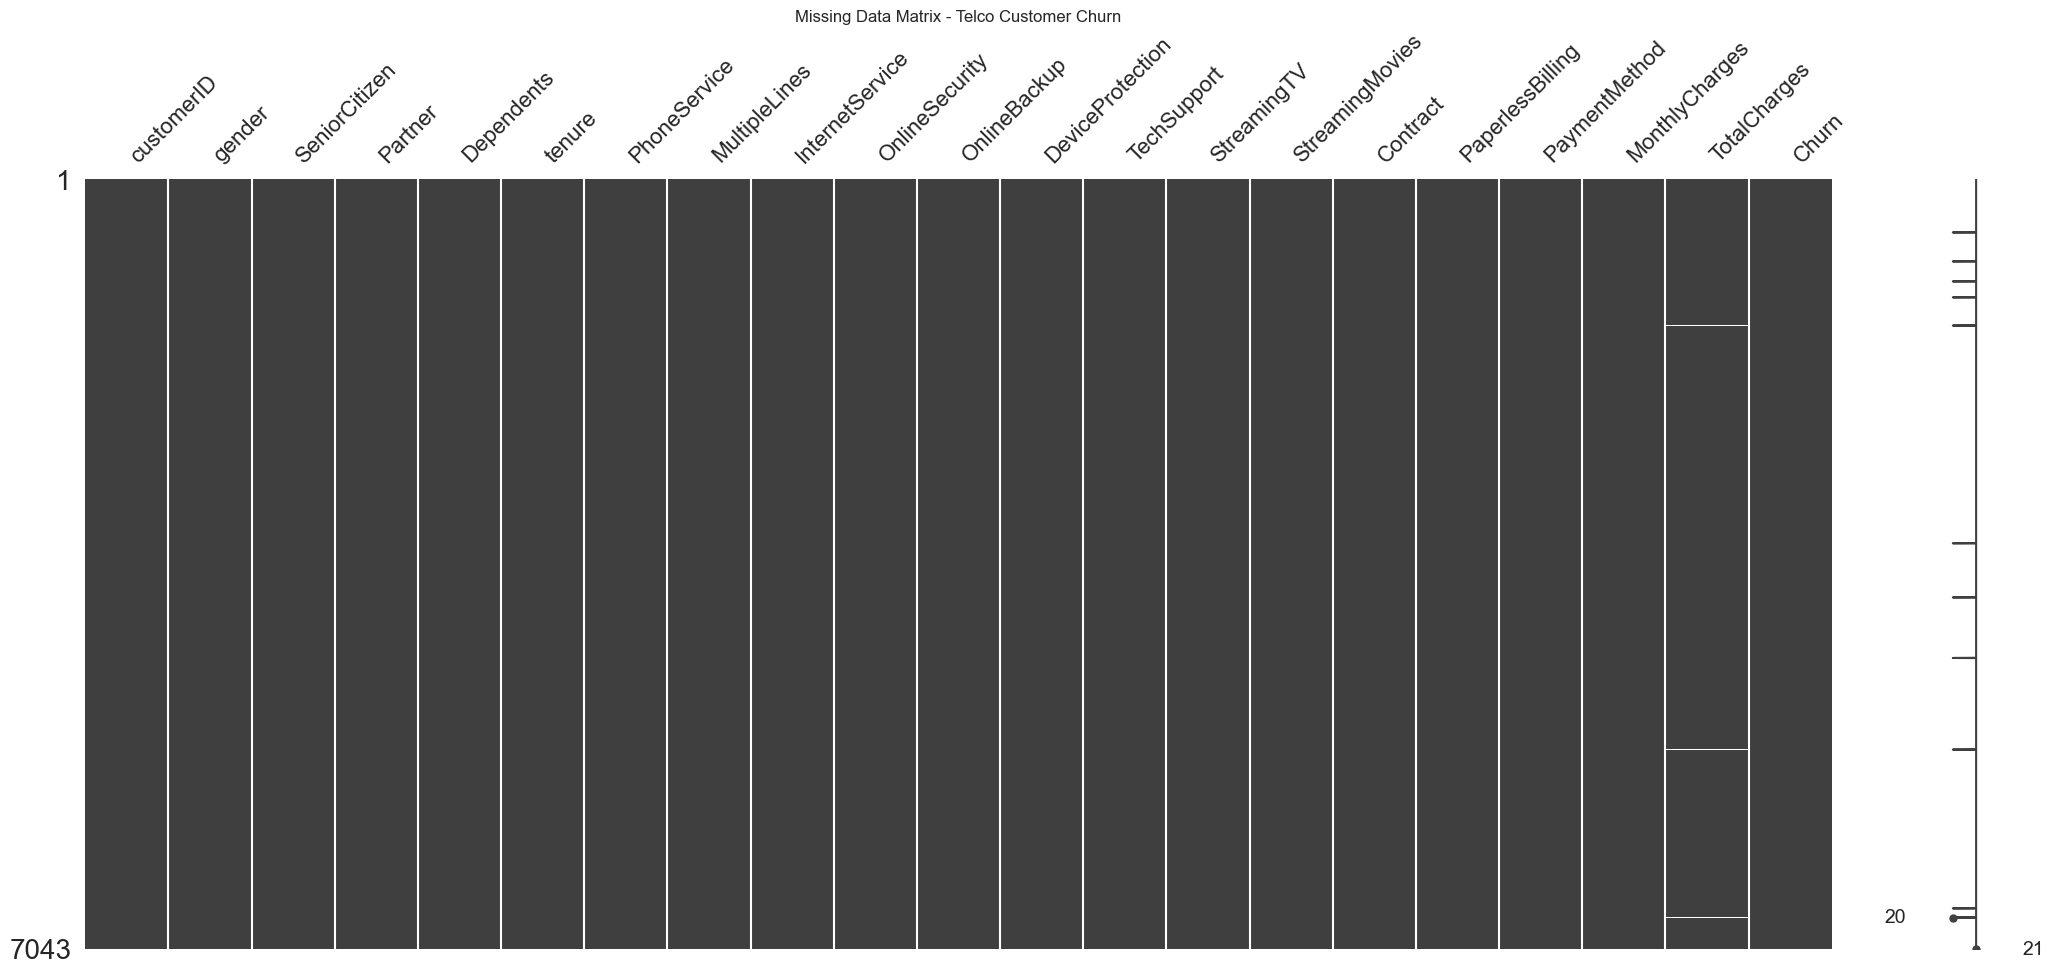

In [8]:
# Visualize missing values using missingno
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.title("Missing Data Matrix - Telco Customer Churn")
plt.tight_layout()
plt.savefig("../images/missing_data_matrix.png")
plt.show()

### 🧹 Final Data Cleaning: Drop Non-Predictive and Incomplete Rows

- We remove the `customerID` column, as it serves only as an identifier
- We drop 11 rows with missing `TotalCharges`, all of which have `tenure = 0`
- These entries represent new customers who haven’t received their first bill — keeping them adds noise

We now have a clean dataset ready for exploration and modeling.


In [9]:
# Drop non-informative customer ID
df.drop('customerID', axis=1, inplace=True)

# Drop rows where TotalCharges is NaN (all have tenure = 0 and no billing history)
rows_before = df.shape[0]
df = df[df['TotalCharges'].notnull()].copy()
df.reset_index(drop=True, inplace=True)
rows_after = df.shape[0]

print(f"🧹 Cleaned dataset: {rows_before - rows_after} rows dropped (missing TotalCharges).")
print(f"✅ Final shape: {df.shape}")


🧹 Cleaned dataset: 11 rows dropped (missing TotalCharges).
✅ Final shape: (7032, 20)


## 📈 Univariate Analysis: Numerical Features

We begin exploratory data analysis by visualizing the distribution of key numeric features:

- **`tenure`**: How long the customer has been with the company (in months)
- **`MonthlyCharges`**: The monthly billing amount
- **`TotalCharges`**: Total paid to date

These plots help identify:
- Skewness or distribution shape
- Outliers or heavy clusters
- Need for transformations or binning


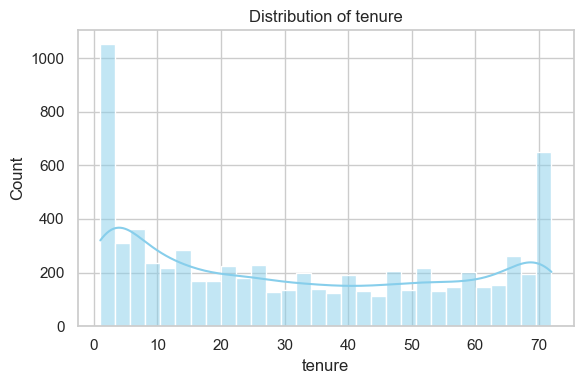

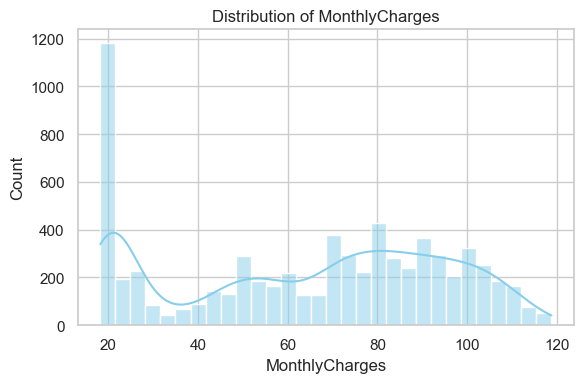

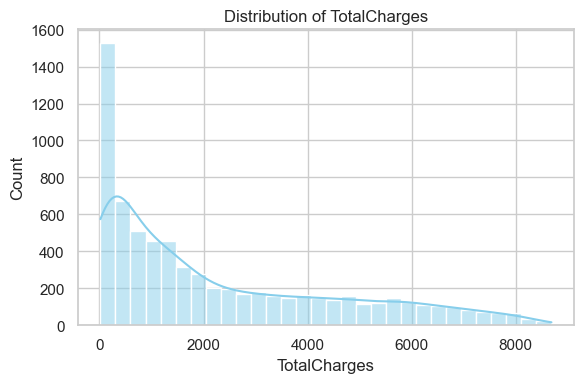

In [10]:
# Define important numeric columns for univariate analysis
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
important_plots = ['tenure', 'MonthlyCharges']  # Only save the most impactful ones

# Create subfolder for images if needed
os.makedirs("../images/univariate", exist_ok=True)

# Generate distribution plots
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()

    # Save only important plots
    if col in important_plots:
        plt.savefig(f"../images/univariate/{col.lower()}_distribution.png")

    plt.show()


### 📊 Univariate Analysis: Categorical Features

We visualize the distribution of key categorical variables such as `Contract`, `InternetService`, and `TechSupport`.

These plots help us:
- Understand feature balance (e.g., are most customers on month-to-month?)
- Identify categories that may drive churn
- Select which features to encode or drop later

Only plots with meaningful class distribution have been saved for documentation or future reporting.


In [11]:
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'TechSupport', 'Contract',
            'PaperlessBilling', 'PaymentMethod']

# Only keep/save the plots that visually show imbalance or potential impact
important_cat_plots = ['Contract', 'InternetService', 'TechSupport']
os.makedirs("../images/univariate", exist_ok=True)


C:\Users\Owner\AppData\Local\Temp\ipykernel_26280\1305067757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


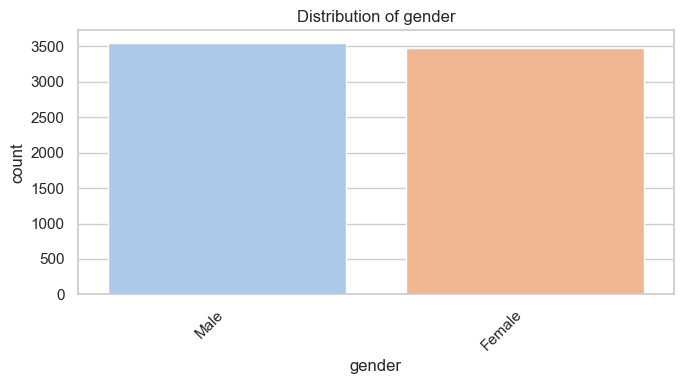

C:\Users\Owner\AppData\Local\Temp\ipykernel_26280\1305067757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


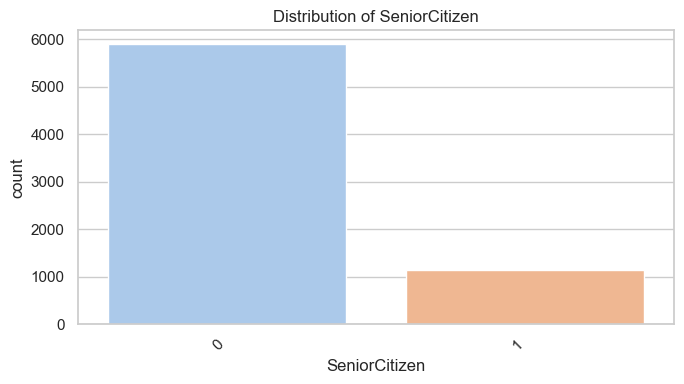

C:\Users\Owner\AppData\Local\Temp\ipykernel_26280\1305067757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


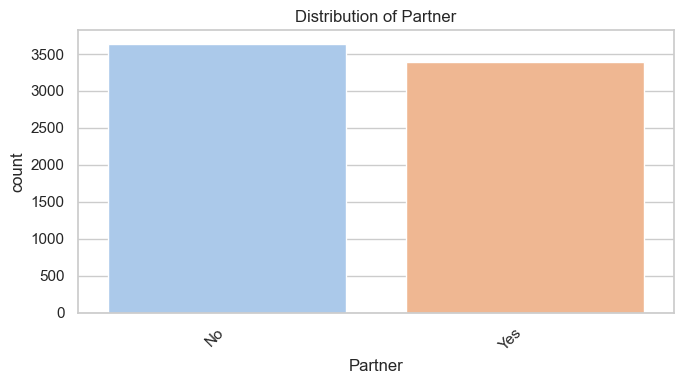

C:\Users\Owner\AppData\Local\Temp\ipykernel_26280\1305067757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


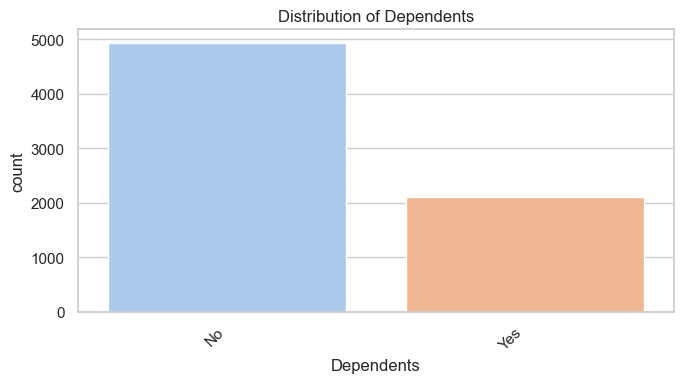

C:\Users\Owner\AppData\Local\Temp\ipykernel_26280\1305067757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


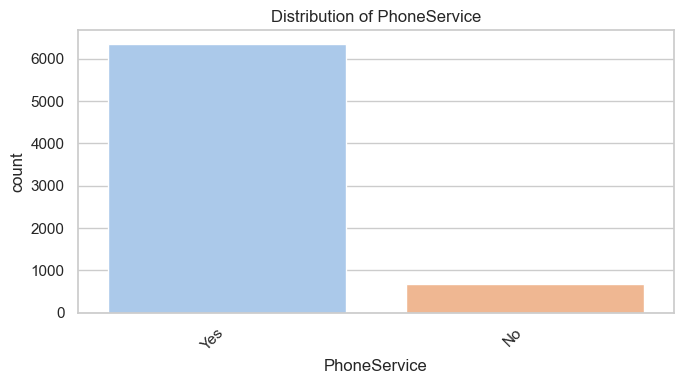

C:\Users\Owner\AppData\Local\Temp\ipykernel_26280\1305067757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


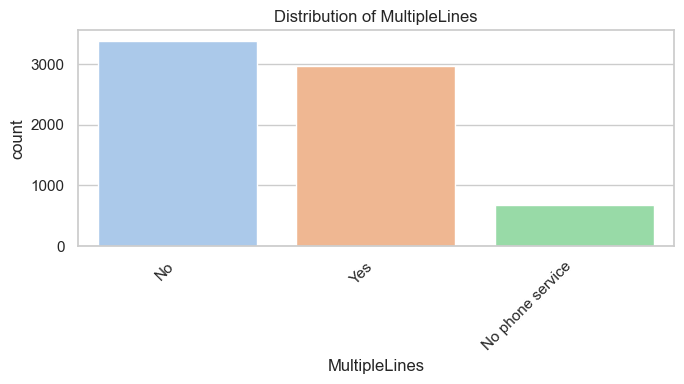

C:\Users\Owner\AppData\Local\Temp\ipykernel_26280\1305067757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


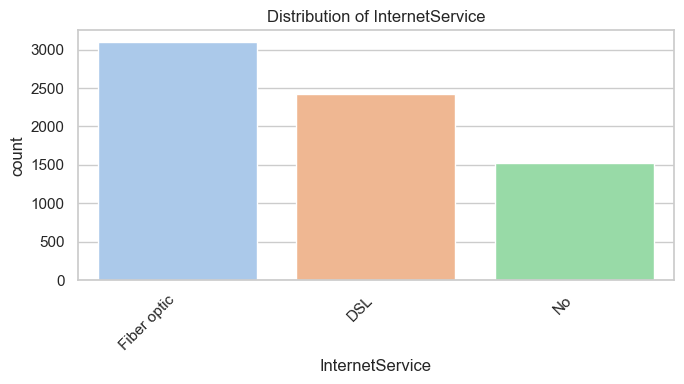

C:\Users\Owner\AppData\Local\Temp\ipykernel_26280\1305067757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


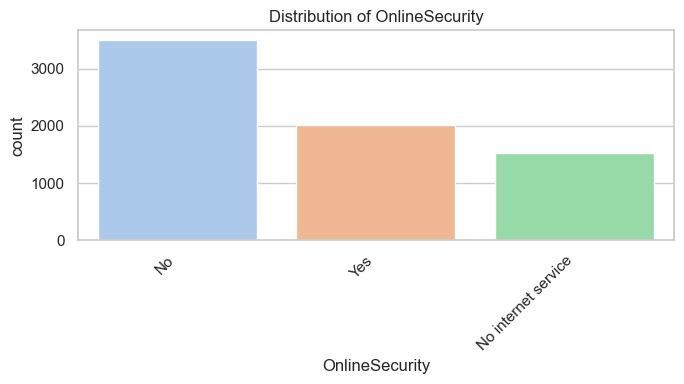

C:\Users\Owner\AppData\Local\Temp\ipykernel_26280\1305067757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


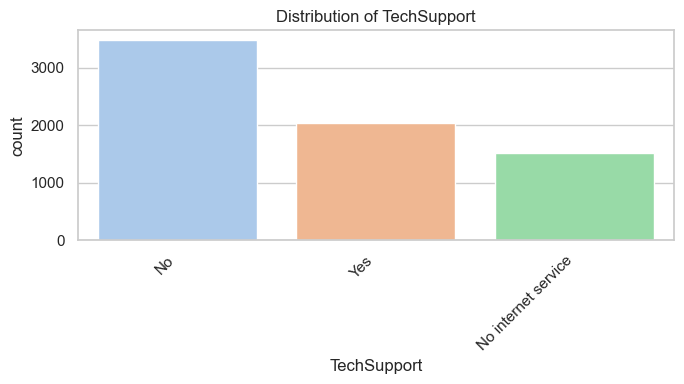

C:\Users\Owner\AppData\Local\Temp\ipykernel_26280\1305067757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


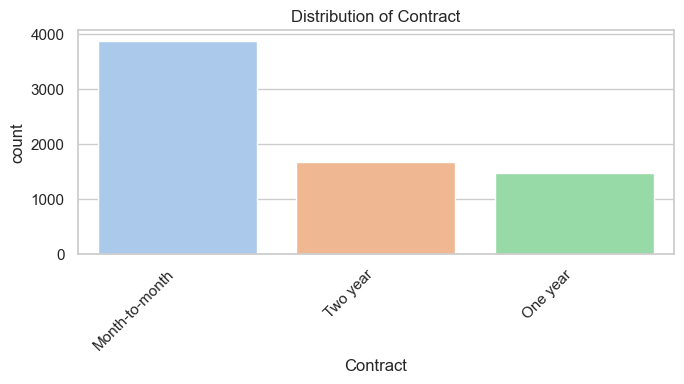

C:\Users\Owner\AppData\Local\Temp\ipykernel_26280\1305067757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


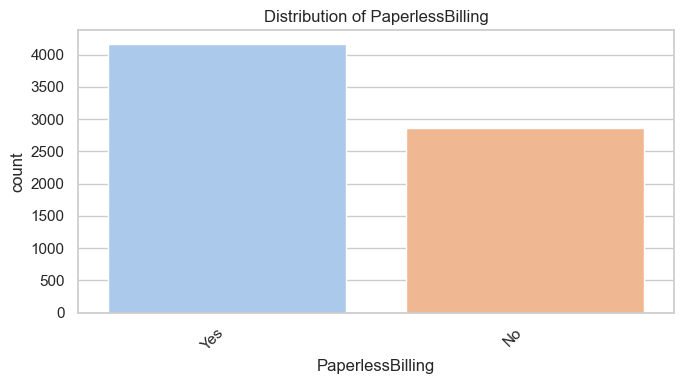

C:\Users\Owner\AppData\Local\Temp\ipykernel_26280\1305067757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


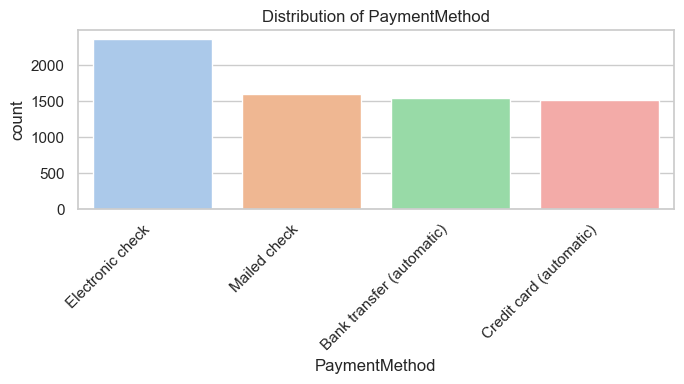

In [12]:
for col in cat_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Save only the important plots
    if col in important_cat_plots:
        plt.savefig(f"../images/univariate/{col.lower()}_countplot.png")

    plt.show()


## 📈 Bivariate Analysis: Numerical Features vs. Churn

In our univariate analysis, we looked at each numeric column individually — stuff like how long people have been with the company (`tenure`) and how much they’re paying each month.

That gave us a sense of what the data *looks like*, but not what it *means* in relation to churn.

So now we’re asking:
> **“Do people who pay more tend to churn?”**  
> **“Are long-tenured customers more loyal?”**

To explore that, we’re using **violin plots**. These show the shape of the data distribution (like a sideways density plot), but split by churned vs. not churned.

What we’re hoping to spot:
- Differences in spending behavior
- Whether churners have a consistent profile (e.g., newer customers, higher charges)
- Features that visually separate churners from loyal users — which could become **strong signals in our model**

It’s a bit like comparing two customer profiles side by side and asking, *"what’s different about the folks who leave?"*


C:\Users\Owner\AppData\Local\Temp\ipykernel_26280\3676877643.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y=col, palette='Set2')


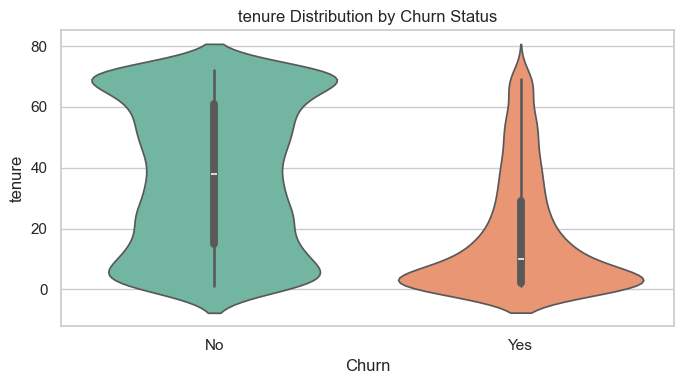

C:\Users\Owner\AppData\Local\Temp\ipykernel_26280\3676877643.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y=col, palette='Set2')


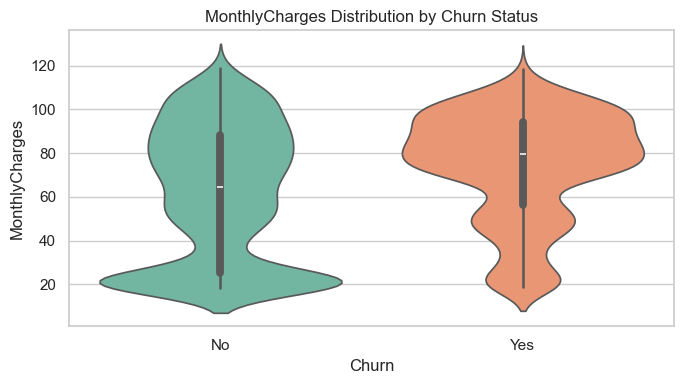

C:\Users\Owner\AppData\Local\Temp\ipykernel_26280\3676877643.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y=col, palette='Set2')


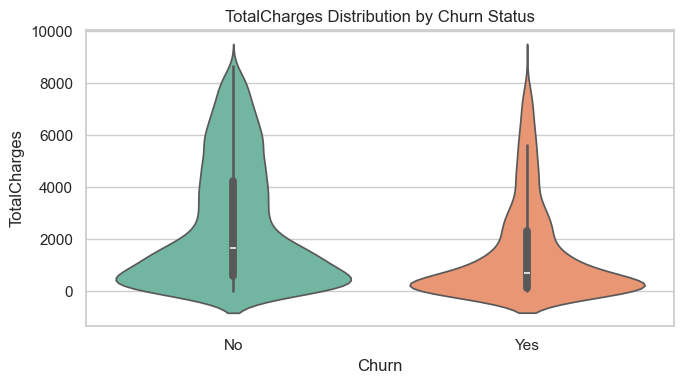

In [13]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
important_num_plots = ['tenure', 'MonthlyCharges']  # TotalCharges is optional

os.makedirs("../images/bivariate", exist_ok=True)

for col in num_cols:
    plt.figure(figsize=(7, 4))
    sns.violinplot(data=df, x='Churn', y=col, palette='Set2')
    plt.title(f"{col} Distribution by Churn Status")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.tight_layout()

    if col in important_num_plots:
        plt.savefig(f"../images/bivariate/{col.lower()}_vs_churn_violin.png")

    plt.show()


## 📊 Bivariate Analysis: Categorical Features vs. Churn

Now that we've explored each feature on its own (univariate analysis), it’s time to ask the bigger question:

> “How do these features actually relate to churn?”

This is where bivariate analysis comes in. Instead of just looking at how many people use a particular contract or service, we now ask:

> **"Do people on month-to-month contracts churn more?"**  
> **"Is having tech support actually linked to customer loyalty?"**

To answer these, we're breaking down churn rates across different categories using stacked percentage bar charts. These visualizations help us spot patterns — not just counts.

Think of this as connecting the dots:
- In univariate EDA, we noticed many users were on month-to-month plans.
- Now, we’ll see if that group also happens to have high churn — and if so, that feature becomes **gold** for our model.

By doing this, we’re not just making pretty plots — we’re building **a case for why certain features should be used in our prediction model**.


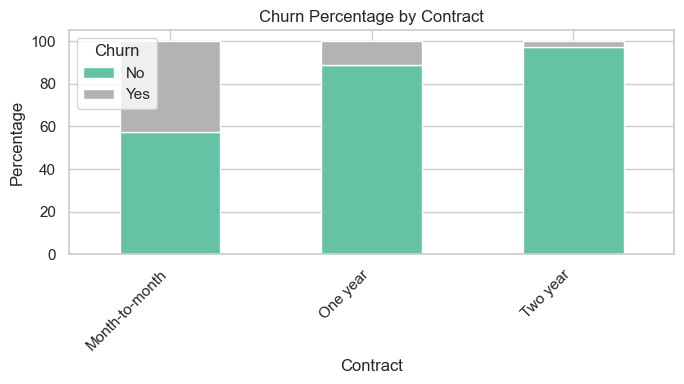

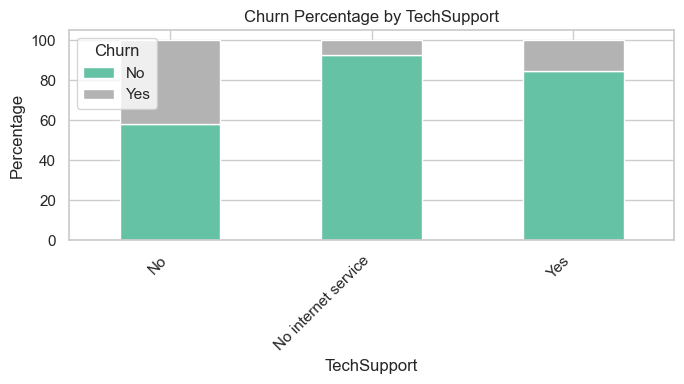

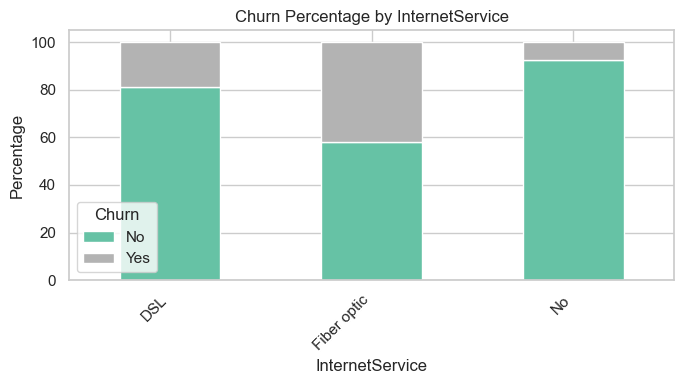

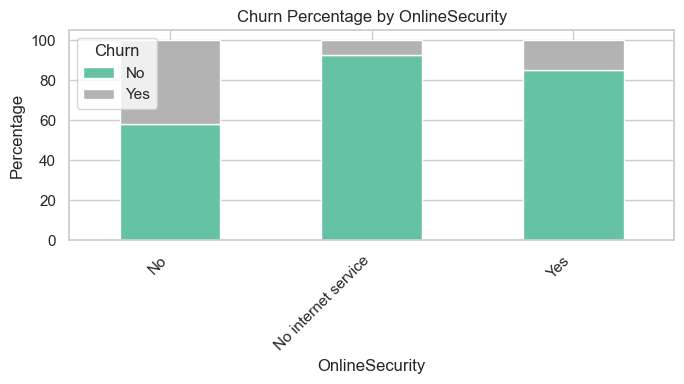

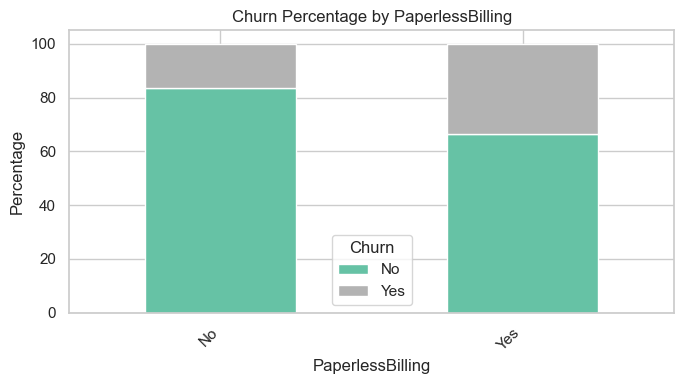

In [14]:
# Define important categorical features to plot
cat_cols = ['Contract', 'TechSupport', 'InternetService', 'OnlineSecurity', 'PaperlessBilling']
os.makedirs("../images/bivariate", exist_ok=True)

for col in cat_cols:
    churn_percent = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100

    churn_percent.plot(kind='bar', stacked=True, figsize=(7, 4), colormap='Set2')
    plt.title(f'Churn Percentage by {col}')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn')
    plt.tight_layout()

    plt.savefig(f"../images/bivariate/churn_by_{col.lower()}.png")
    plt.show()


### 🧍‍♂️ Customer Personas: Churners vs. Non-Churners

Now that we’ve looked at how features relate to churn individually, let’s step back and build a simple profile of the two customer types: those who stay and those who leave.

By comparing median values across churn groups, we can get a feel for:
- How long they stay (`tenure`)
- How much they pay monthly
- How much they’ve paid overall

This is the first step in turning our data into **real people** — it helps us think like the business, not just the model.

For example:
- Churners tend to have **shorter tenure** and **higher monthly charges**, but lower total charges overall (since they don’t stay long enough to accumulate much).
- Non-churners are usually **longer-tenure customers** with more accumulated value — likely to be stickier and more loyal.

This gives us a human lens before we jump into pure math.


In [15]:
# Median values grouped by churn
df.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].median()


,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,38.0,64.45,1683.60
Yes,10.0,79.65,703.55


✔ Churners have a median tenure of just 10 months, while non-churners stay 38 months.
✔ Monthly charges are slightly higher for churners suggesting high cost may contribute to churn.
✔ Total charges are much lower for churners due to their shorter tenure.


### 🔗 Feature Correlations

Before we throw everything into a model, it's smart to check which features are strongly related to each other.

Why?
- Some features may be **redundant** (like `tenure` and `TotalCharges`)
- Highly correlated inputs can mess with models like logistic regression
- It helps us think through whether certain columns add new information, or just repeat something we already know

So we run a correlation heatmap — not to look for causation, but to spot overlaps.

From our heatmap:
- `TotalCharges` and `tenure` are very closely tied (which makes sense: longer tenure = more charges)
- `MonthlyCharges` has a weaker but still noticeable connection to both

This suggests we might be able to drop `TotalCharges` later — especially if we’re using regularized models or want to avoid feature multicollinearity.


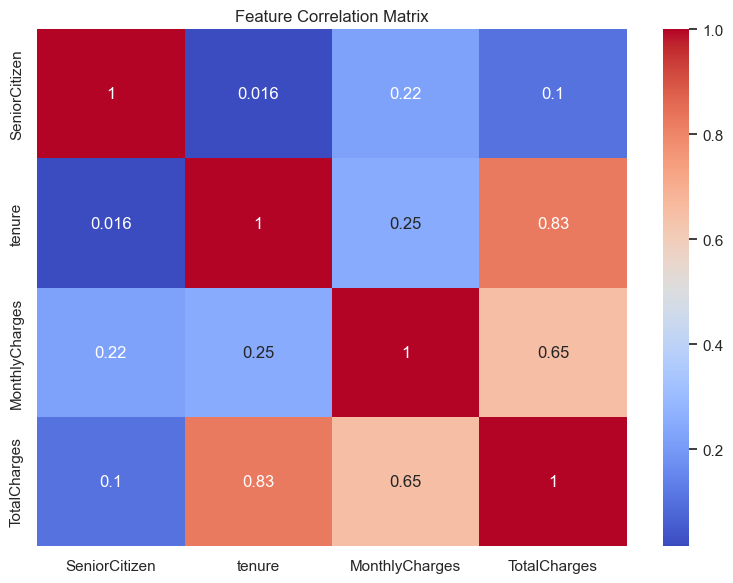

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.savefig("../images/feature_correlation_heatmap.png")
plt.show()

✔ `TotalCharges` shows a strong positive correlation with `tenure` and a moderate one with `MonthlyCharges`.
✔ Due to this correlation, we may consider dropping `TotalCharges` during modeling to avoid redundancy.


### 🚨 High-Risk Churn Profiles

Finally, let’s zoom in on a specific segment we think might be *at-risk* — based on everything we’ve learned.

We filter for customers who:
- Have **month-to-month contracts**
- Use **fiber optic internet**
- **Don’t have tech support**
- And **churned**

This group is important because they check multiple boxes:
- They’re flexible enough to leave easily
- They may be paying more (fiber)
- And they’re not getting help when things go wrong

Looking at their `tenure` and `MonthlyCharges`, we see they tend to be **new-ish customers paying higher bills**, which reinforces a classic business insight:

> *High-paying, unsupported customers are the quickest to leave.*

These micro-insights help us shape feature engineering, model tuning, and even real business strategies (like outreach to new fiber users).

**Note:** This segment may not be the largest, but it’s high-value for targeting interventions (discounts, onboarding support, etc.).



In [17]:
# Create a filtered DataFrame of "at-risk" churners
high_risk = df[
    (df['Churn'] == 'Yes') &
    (df['Contract'] == 'Month-to-month') &
    (df['TechSupport'] == 'No') &
    (df['InternetService'] == 'Fiber optic')
]

# Summarize this group
high_risk[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,1033.000000,1033.000000,1033.000000
mean,15.647628,85.349226,1415.246902
std,16.546146,10.760796,1589.317693
min,1.000000,67.750000,68.500000
25%,2.000000,75.450000,184.650000
50%,9.000000,84.800000,809.750000
75%,24.000000,94.600000,2196.150000
max,71.000000,113.200000,7548.100000


✔ Many churners are month-to-month users with fiber optic internet and no tech support.
✔ This segment pays higher monthly charges (~$80) but has low tenure, indicating dissatisfaction despite premium service.

## 📌 EDA Summary: What We Learned and What Comes Next

After digging into the Telco Customer Churn dataset, here’s what we uncovered:

### 💡 Key Patterns
- **Tenure** is one of the clearest signals — customers who leave tend to do so early
- **MonthlyCharges** are higher for churners, while **TotalCharges** are naturally lower (since they haven't been around as long)
- **Contract type, Tech Support, and Internet Service** show strong churn patterns — especially for customers with month-to-month plans and no support

### 🔍 Hidden Personas
We also spotted a clear high-risk profile:
- Month-to-month
- Fiber optic users
- No tech support

These customers are likely paying more, getting less help, and leaving faster.

### 🔗 Correlations
- `tenure` and `TotalCharges` are tightly correlated — good to know before modeling
- Many service-related features offer unique information, not strongly correlated with each other

## ✅ What’s Next?

Now that we’ve uncovered clear churn patterns and identified which features matter most, we’re ready to start building our predictive model.

In the next notebook, we’ll:
- Use what we learned here to clean and engineer features
- Train classification models to predict churn
- Evaluate their performance using accuracy, precision, recall, and business impact

👉 Head to `churn_modeling.ipynb` to continue the journey.

See you there! 🚀
